Ce premier morceau de code prend en entrée le fichier ScoringTraining.csv et renvoie une boite à moustache .

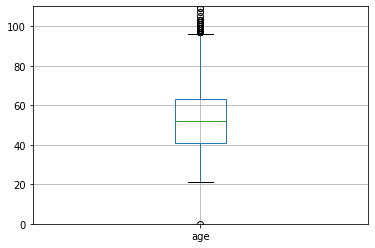

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#changement de l'echelle de l'axe
plt.ylim(0, 110)
#lecture du fichier csv
data = pd.read_csv("ScoringTraining.csv")
#creation d'une boite à moustache
boxplot = data.boxplot(column='age')
plt.show()


On visualise ensuite la matrice de nullité des données.

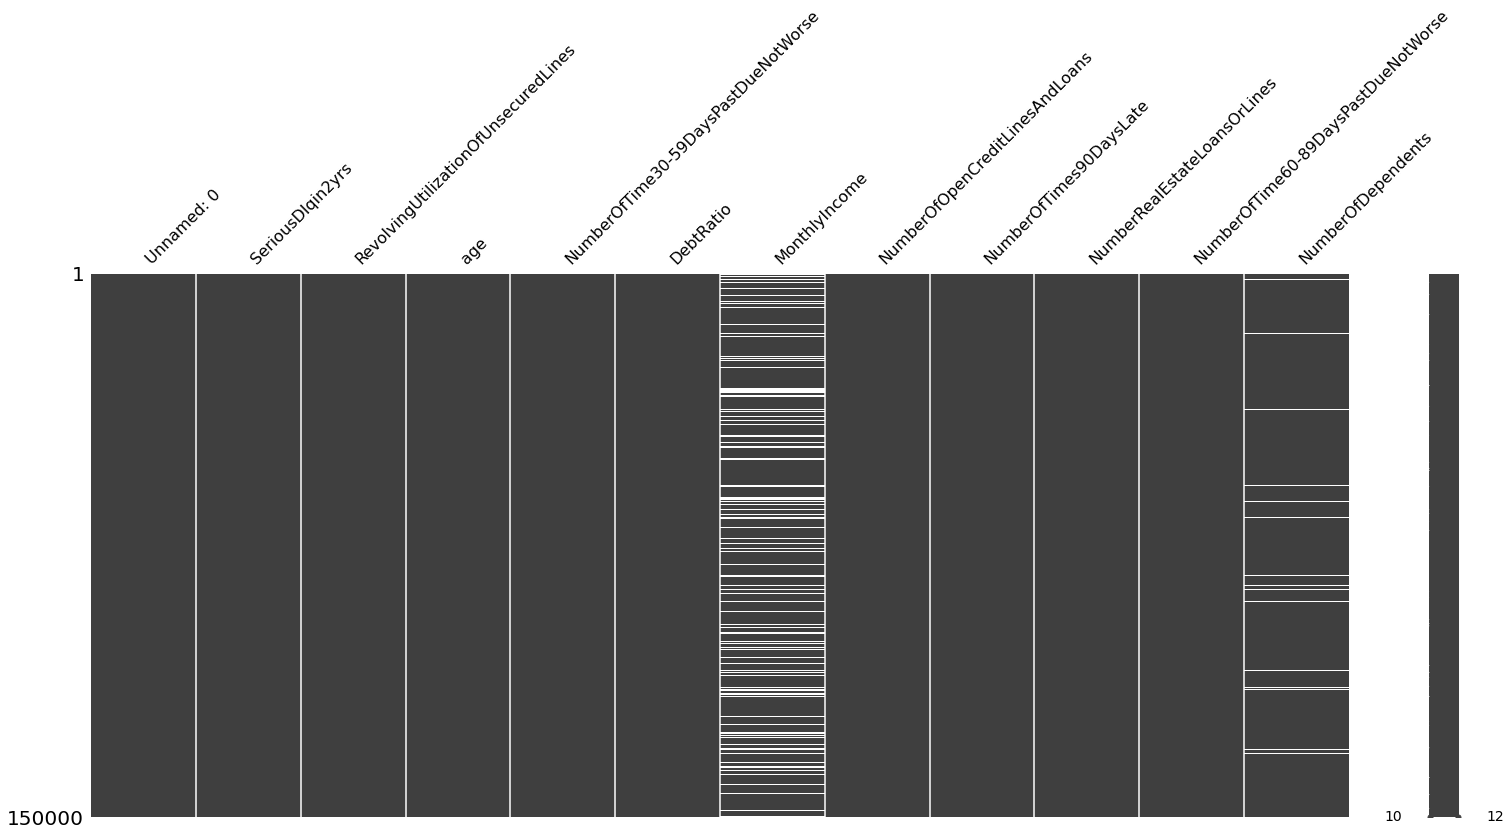

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

#lecture du fichier csv
data = pd.read_csv("ScoringTraining.csv")
msno.matrix(data)
plt.show()


Et le diagramme de nullité par colonne

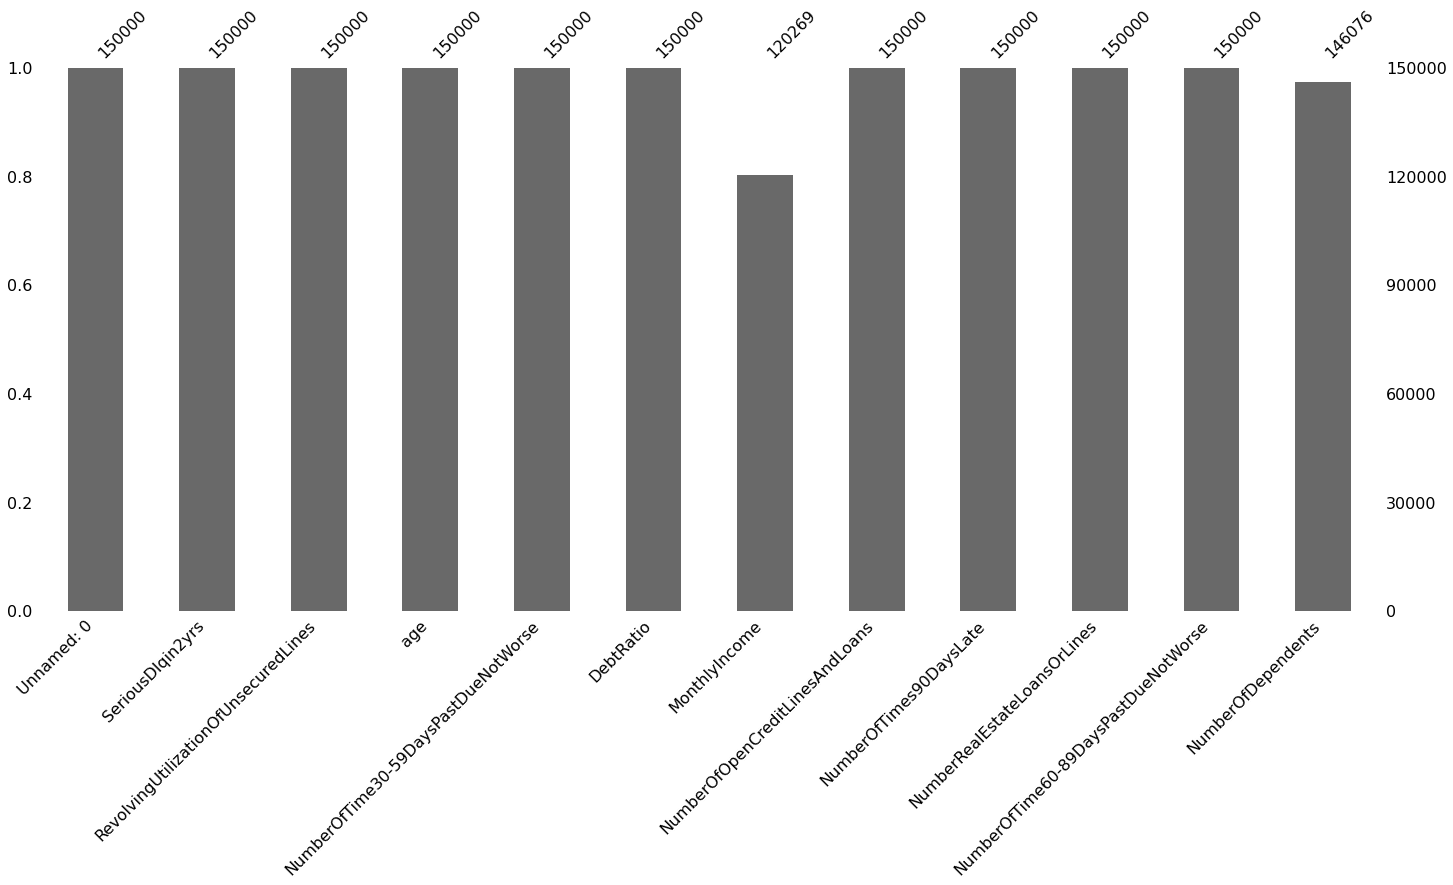

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

#lecture du fichier csv
data = pd.read_csv("ScoringTraining.csv")
msno.bar(data)
plt.show()


On groupe nos données selon la valeur de ***SeriousDlqin2yrs*** et on les visualise dans des boites à moustaches

[Text(0, 0, '0'), Text(0, 0, '1')]

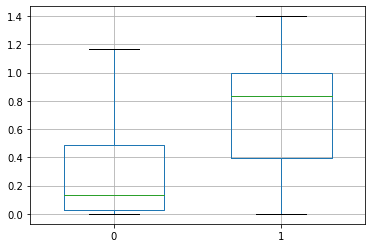

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("training_data.csv")


# splitting dataframe by groups
grouped = data.groupby(data.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='RevolvingUtilizationOfUnsecuredLines',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='RevolvingUtilizationOfUnsecuredLines',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])


Tentative de l'implémentation de l'AFD

In [ ]:
import numpy as np
import pandas as pd

class AFD:

    def fit(self, X, y):
        n_features = X.shape[1]#prendre le nombre de colone existent en X
        class_labels = np.unique(y)#vrenvoi le valeur unique du vecteur y

        mean_overall = np.mean(X, axis=0)#calculer g totale
        SW = np.zeros((n_features, n_features))#creer une matrice de zero de n_features ligne et de n_features colone
        SB = np.zeros((n_features, n_features))
        gravities=[]
        for c in class_labels:
            X_c = X[y == c]#creer la matrice x_c depuis x lorsque y=c
            mean_c = np.mean(X_c, axis=0)#calculer la gravites des classes
            SW += (X_c - mean_c).T.dot((X_c - mean_c))#calculer W
            n_c = X_c.shape[0]
            #calculer B
            mean_diff = (mean_c - mean_overall)
            SB += n_c * (mean_diff).dot(mean_diff.T)
            gravities.append(mean_c)



        V = np.add(SB, SW)#calculer v
        V_inv = np.linalg.inv(V)#calculer linv de v

        u=np.dot(V_inv,np.subtract(gravities[0],gravities[1]))#calculer u
        a=np.subtract(gravities[0],gravities[1])#calculer a
        s1=np.dot(np.transpose(gravities[0]),np.linalg.inv(SW))#calculer s1
        s1=np.dot(s1,a)
        s2 = np.dot(np.transpose(gravities[1]), np.linalg.inv(SW))#calculer s2
        s2 = np.dot(s2, a)
        c=np.add(s1,s2)*1/2#calculer c
        print(c)

csv=pd.read_csv("training_data.csv")
Y=csv.iloc[:,1]
X=csv.iloc[:,2:11]
afd=AFD()
afd.fit(X,Y)

-5.2621224209244435e-05


LDA

Mean Accuracy: 0.757 (0.010)


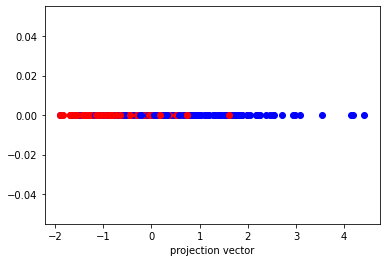

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# Importation des données
csv=pd.read_csv("training_data.csv")
Y=csv.iloc[:,1]
X=csv.iloc[:,2:11]
model=LinearDiscriminantAnalysis(n_components=1)
# Apprentiassage
score=model.fit(X,Y).transform(X)
y_pred=model.predict(X)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Goodness of fit
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
# Choix de 300 points aléatoires
random_choices=[random.randint(0,len(score)-1) for i in range(0,300)]
score1=[score[i] for i in random_choices]
y_train1=[Y[i] for i in random_choices]
# Représentation graphique
for k,i in zip (score1,y_train1):
    if i==1:
        plt.scatter(k,0,c="b")
    else :
        plt.scatter(k,0,c="r")
plt.xlabel('projection vector')
plt.show()

QDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# Importation des données
csv=pd.read_csv("training_data.csv")
Y=csv.iloc[:,1]
X=csv.iloc[:,2:11]
model=QuadraticDiscriminantAnalysis()
# Apprentiassage
score=model.fit(X,Y)
y_pred=model.predict(X)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Goodness of fit
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.742 (0.009)


In [ ]:
Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


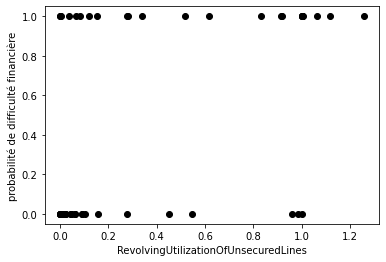

Mean Accuracy: 0.742 (0.009)


In [ ]:
import  pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
csv=pd.read_csv("training_data.csv")
Y=csv.iloc[:,1]
X=csv.iloc[:,2:11]
logistic_reg=LogisticRegression()
score=logistic_reg.fit(X,Y)


ruoul=csv.iloc[:,2]
age=csv.iloc[:,3]
nof_90_late=csv.iloc[:,8]
mnthincome=csv.iloc[:,6]
nod=csv.iloc[:,11]



l=[]
for k in range (0,len(Y)):
    l.append(k)
random_choices=[]
for k in range (0,50):
    j=random.choice(l)
    random_choices.append(j)
    l.remove(j)
score=[]
y_train1=[]
y_train2=[]
y_train3=[]
y_train4=[]
y_train5=[]

for k in (random_choices):
    score.append(Y[k])
    y_train1.append(ruoul[k])
    y_train2.append(age[k])
    y_train3.append(nof_90_late[k])
    y_train4.append(mnthincome[k])
    y_train5.append(nod[k])
for k,i in zip (score,y_train1):
    plt.scatter(i,k,c="k")

plt.ylabel("probabilité de difficulté financière")
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.show()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Goodness of fit
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Evaluation LDA

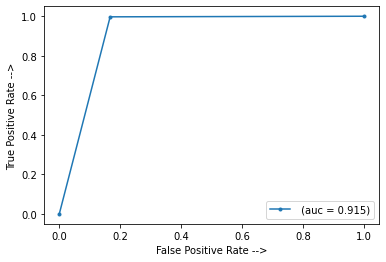

[[66666 13374]
 [    4  1356]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# test.csv = ScoringTest.csv + colonne proba de SampleScoring.csv
csv=pd.read_csv("training_data.csv")
csv2=pd.read_csv("test.csv")
Y=csv.iloc[:,1]
X=csv.iloc[:,2:11]
X_test=csv2.iloc[:,2:11]
Y_true_tmp=csv2.iloc[:,-1]
# si proba > 0.5 alors True, sinon False
Y_true=[]
for i in Y_true_tmp:
    if i>0.5: Y_true.append(True)
    else: Y_true.append(False)
lda=LinearDiscriminantAnalysis(n_components=1)
score=lda.fit(X,Y).transform(X)
Y_pred_tmp=lda.decision_function(X_test)
Y_pred=[]
# si score > 0.5 alors True, sinon False
for i in Y_pred_tmp:
    if i>0.5: Y_pred.append(True)
    else: Y_pred.append(False)

# Courbe ROC
fpr,tpr, threshold = roc_curve(Y_true,Y_pred)
auc = auc(fpr,tpr)
plt.figure()
plt.plot(logistic_fpr,logistic_tpr,marker='.', label=' (auc = %0.3f)' % auc)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Matrice de Confusion
matrix=confusion_matrix(Y_true,Y_pred)
print(matrix)





Evaluation QDA

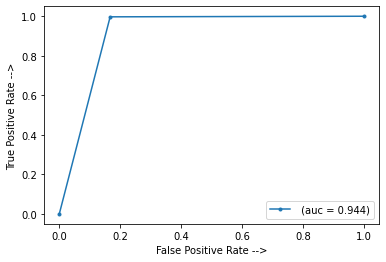

[[71268  8772]
 [    3  1357]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# test.csv = ScoringTest.csv + colonne proba de SampleScoring.csv
csv=pd.read_csv("training_data.csv")
csv2=pd.read_csv("test.csv")
Y=csv.iloc[:,1]
X=csv.iloc[:,2:11]
X_test=csv2.iloc[:,2:11]
Y_true_tmp=csv2.iloc[:,-1]
# si proba > 0.5 alors True, sinon False
Y_true=[]
for i in Y_true_tmp:
    if i>0.5: Y_true.append(True)
    else: Y_true.append(False)
model=QuadraticDiscriminantAnalysis()
score=model.fit(X,Y)
Y_pred_tmp=model.decision_function(X_test)
Y_pred=[]
# si score > 0.5 alors True, sinon False
for i in Y_pred_tmp:
    if i>0.5: Y_pred.append(True)
    else: Y_pred.append(False)

# Courbe ROC
fpr,tpr, threshold = roc_curve(Y_true,Y_pred)
auc = auc(fpr,tpr)
plt.figure()
plt.plot(logistic_fpr,logistic_tpr,marker='.', label=' (auc = %0.3f)' % auc)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Matrice de Confusion
matrix=confusion_matrix(Y_true,Y_pred)
print(matrix)





Evaluation Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


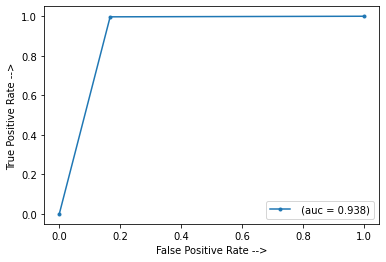

[[70285  9755]
 [    2  1358]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
# test.csv = ScoringTest.csv + colonne proba de SampleScoring.csv
csv=pd.read_csv("training_data.csv")
csv2=pd.read_csv("test.csv")
Y=csv.iloc[:,1]
X=csv.iloc[:,2:11]
X_test=csv2.iloc[:,2:11]
Y_true_tmp=csv2.iloc[:,-1]
# si proba > 0.5 alors True, sinon False
Y_true=[]
for i in Y_true_tmp:
    if i>0.5: Y_true.append(True)
    else: Y_true.append(False)
model=LogisticRegression()
score=model.fit(X,Y)
Y_pred_tmp=model.decision_function(X_test)
Y_pred=[]
# si score > 0.5 alors True, sinon False
for i in Y_pred_tmp:
    if i>0.5: Y_pred.append(True)
    else: Y_pred.append(False)

# Courbe ROC
fpr,tpr, threshold = roc_curve(Y_true,Y_pred)
auc = auc(fpr,tpr)
plt.figure()
plt.plot(logistic_fpr,logistic_tpr,marker='.', label=' (auc = %0.3f)' % auc)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Matrice de Confusion
matrix=confusion_matrix(Y_true,Y_pred)
print(matrix)





Régression linéaire multiple stochastique

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import linear_model
from sklearn.svm import SVC
import numpy as np

data = pd.read_csv("ScoringTraining.csv")

# Defining X & y variables
colnames = list(data.columns)

missing_columns = ["NumberOfDependents",'MonthlyIncome']


def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df


for feature in missing_columns:
    data[feature + '_imp'] = data[feature]
    data = random_imputation(data, feature)


random_data = pd.DataFrame(columns=["Ran" + name for name in missing_columns])

for feature in missing_columns:
    random_data["Ran" + feature] = data[feature + '_imp']
    parameters = list(set(data.columns) - set(missing_columns) - {feature + '_imp'})

    model = linear_model.LinearRegression()
    model.fit(X=data[parameters], y=data[feature + '_imp'])

    # Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(data[parameters])
    std_error = (predict[data[feature].notnull()] - data.loc[data[feature].notnull(), feature + '_imp']).std()

    # observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size=data[feature].shape[0],
                                      loc=predict,
                                      scale=std_error)
    random_data.loc[(data[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[
        (data[feature].isnull()) &
        (random_predict > 0)]


